In [ ]:
Email verification in flask using OTP

In the modern web applications, sometimes the email is verified using the one time password generated randomly by the program. 

In this example, we will create a python script that accepts the user's email id as the input 
from the user and send an email containing the automatically (randomly) generated (4-digit) one-time password.

For the successful verification of the email-id, the user is required to enter the otp sent to the mentioned email id. 

If the OTP entered by the user is matched with the randomly generated OTP, then the email-id is successfully verified, 
and the success message is shown to the user otherwise the verification is failed, and the failure message is shown to the user.

In the below example, A flask script Mailer.py acts as a controller with the functions verify() and validate() associated with 
the URL /verify and /validate respectively. 
These functions also render the HTML templates to accept the input from the user and show the result depending upon the email verification.

In [1]:
from flask import Flask, render_template, request
from flask_mail import Mail, Message
from random import randint
app = Flask(__name__)
app.config['MAIL_SERVER'] = 'smtp.gmail.com'
app.config['MAIL_PORT'] = 465
app.config['MAIL_USERNAME'] = 'saibalajivennelakanti1112@gmail.com'
app.config['MAIL_PASSWORD'] = 'hhur ojxo xnnl hgvw'
app.config['MAIL_USE_TLS'] = False
app.config['MAIL_USE_SSL'] = True
mail = Mail(app)
otp = randint(100000, 999999)
@app.route('/')
def index():
    return render_template('index.html')
@app.route('/verify', methods=["POST"])
def verify():
    email = request.form['email']
    msg = Message('OTP', sender='saibalajivennelakanti1112@gmail.com', recipients=[email])
    msg.body = str(otp)
    mail.send(msg)
    return render_template('verify.html')
@app.route('/validate', methods=["POST"])
def validate():
    user_otp = request.form['otp']
    if otp == int(user_otp):
        return "<h3>Email verification successful</h3>"
    return "<h3>OTP does not match. Try again.</h3>"
if __name__ == '__main__':
    app.run(port=5000)

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
127.0.0.1 - - [20/Sep/2024 16:07:11] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [20/Sep/2024 16:07:21] "POST /verify HTTP/1.1" 200 -


In [ ]:
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <title>Index</title>
</head>
<body>
<form action="/verify" method="post">
    Email:<input type="email" name="email">
    <input type="submit" value="Submit">
</form>
</body>
</html>

save in index.html

In [ ]:
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <title>OTP VERIFY</title>
</head>
<body>
<form action="/validate" method="post">
    <h1>One time password has been sent to the mail id. please check </h1>
    Enter OTP: <input type="text" name="otp">
    <input type="submit" value="Submit">
</form>
</body>
</html>

save in verify.html

In previous notes I forgot to tell you make sure the html files in templates folder. create templates folder in your project folder

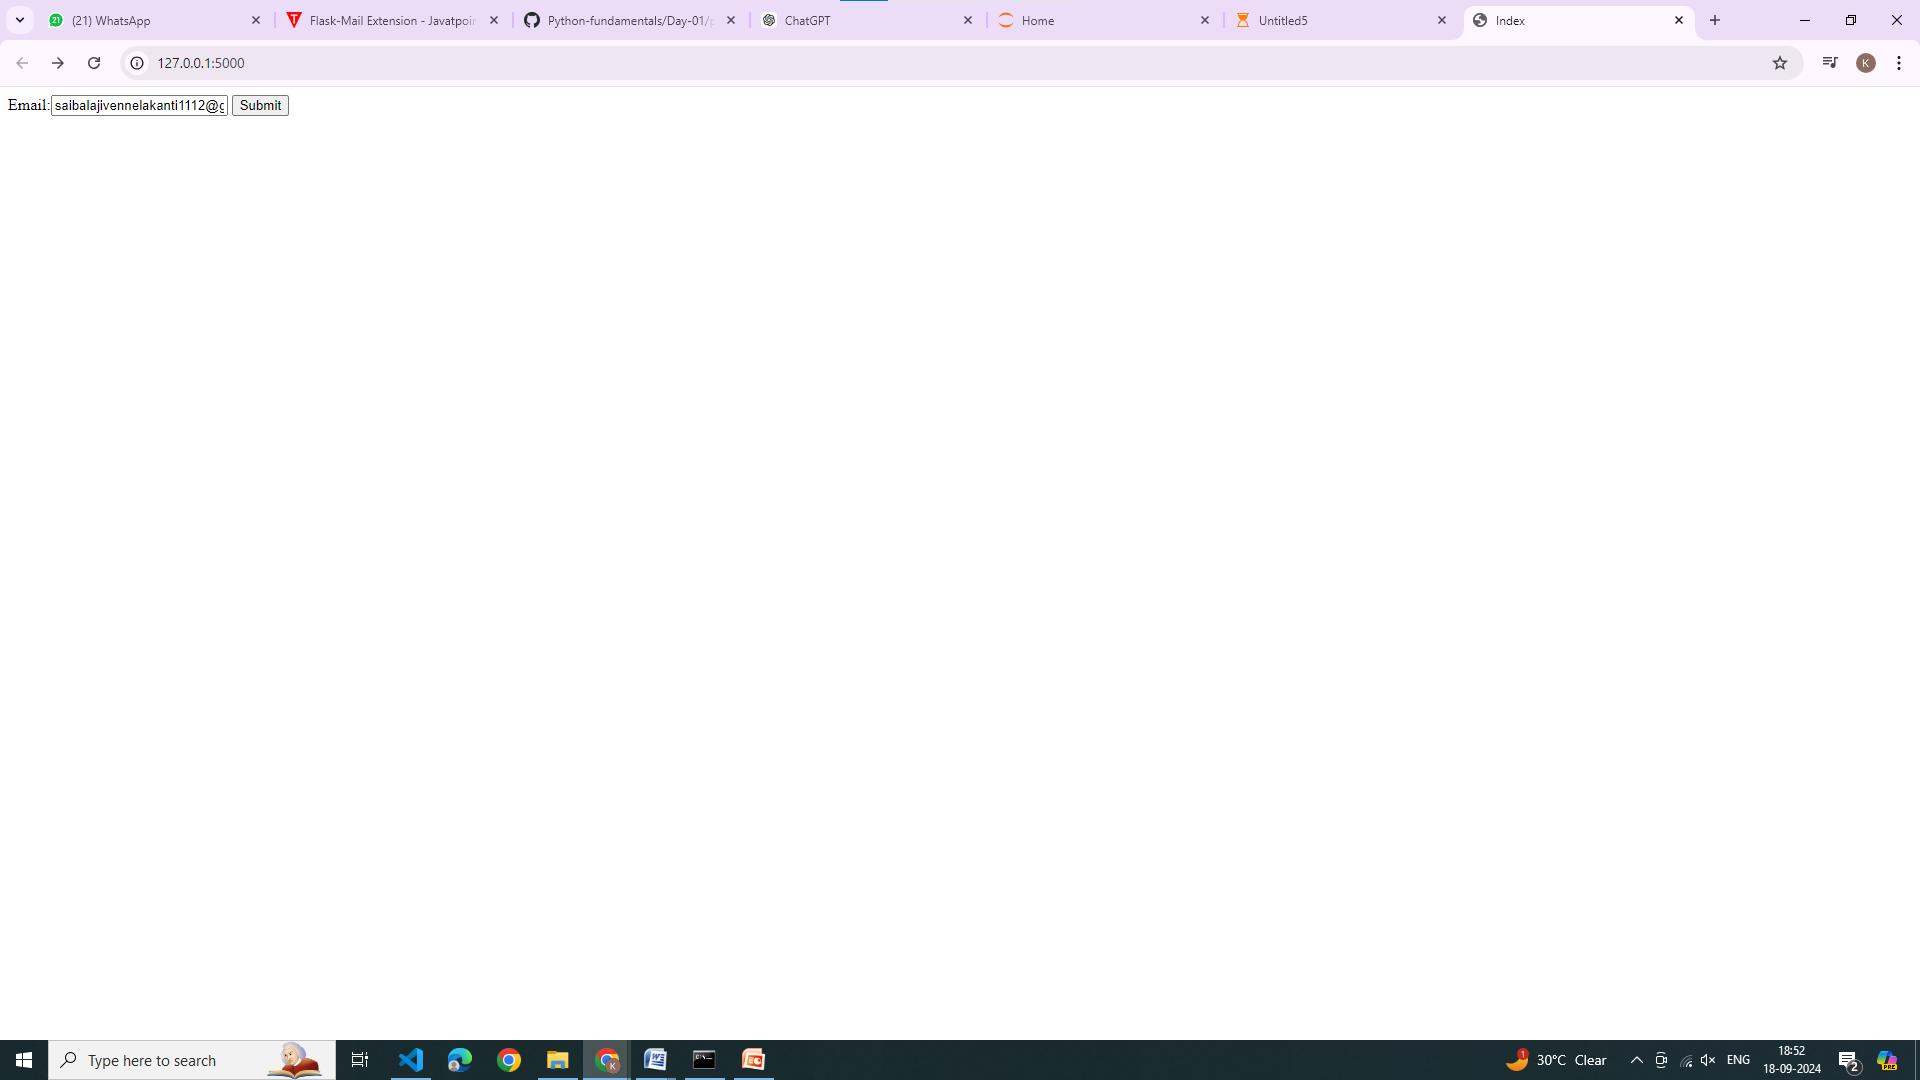

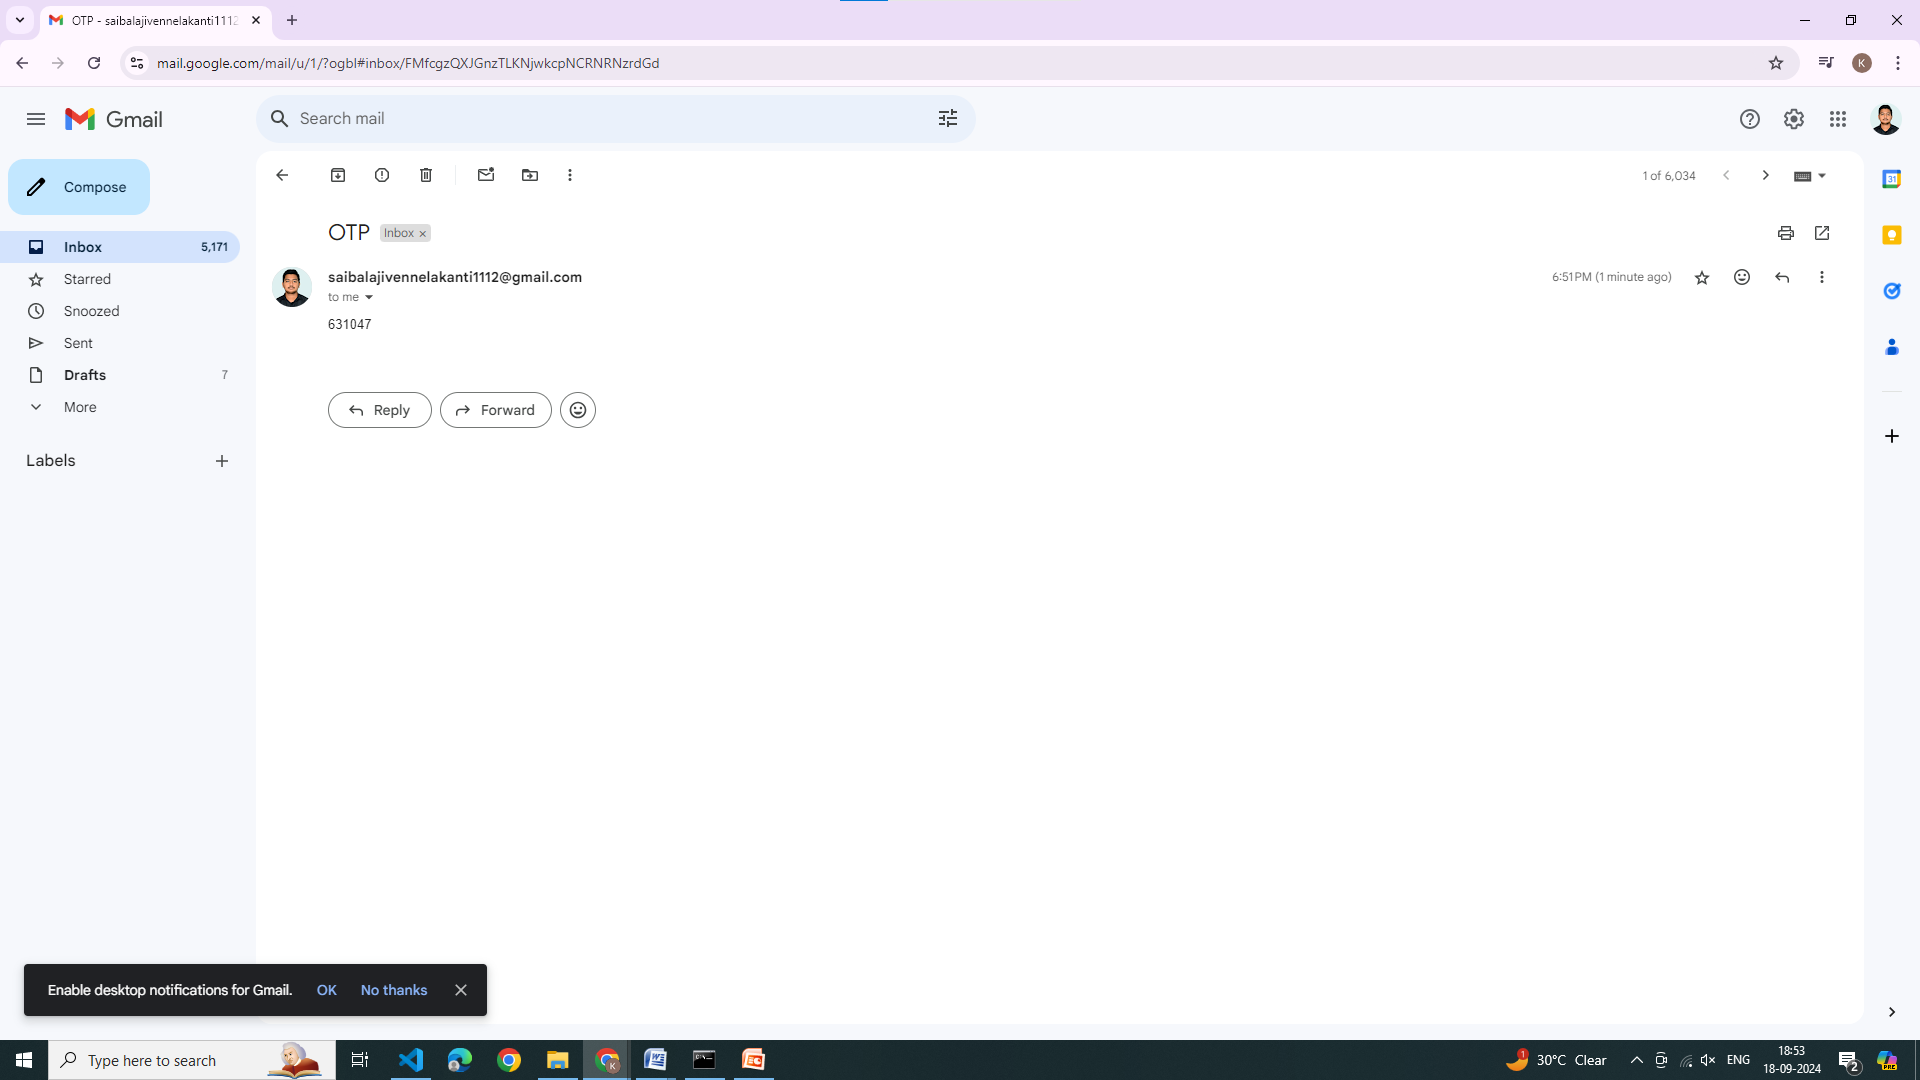

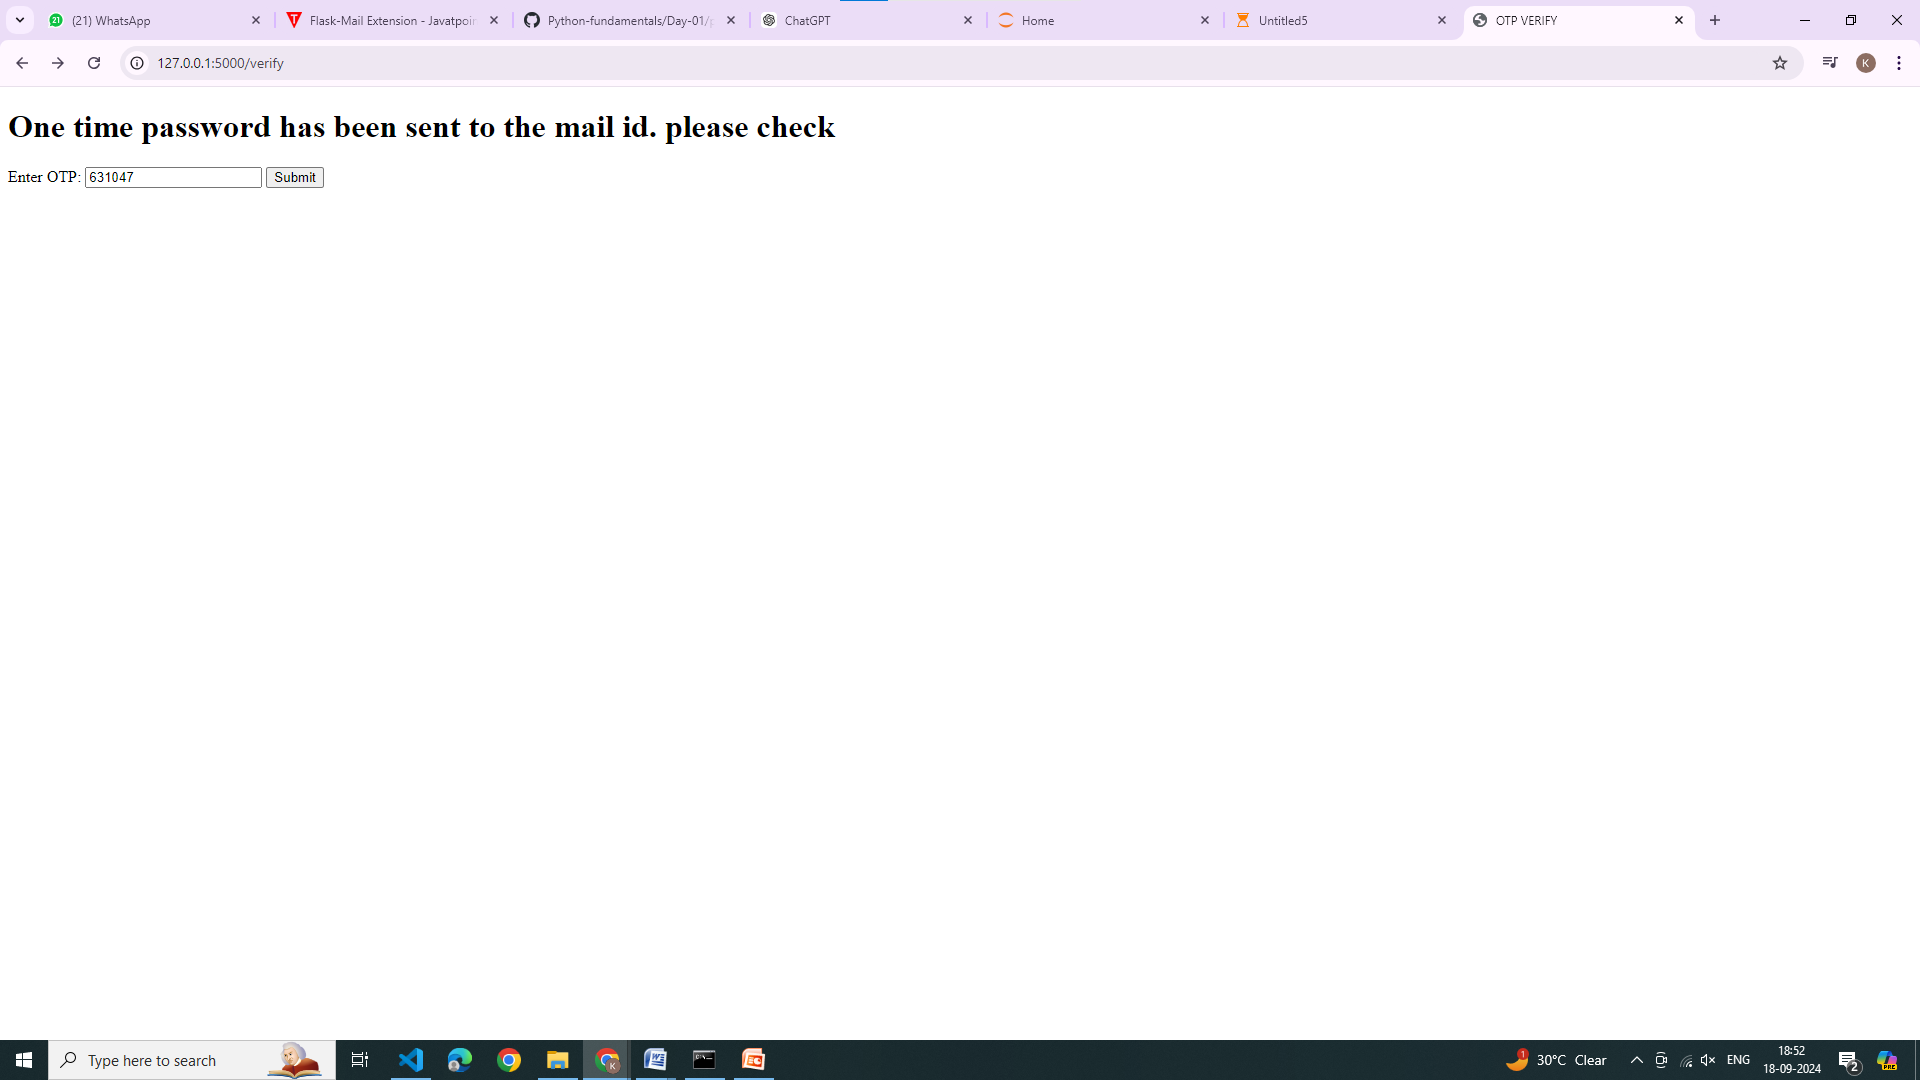

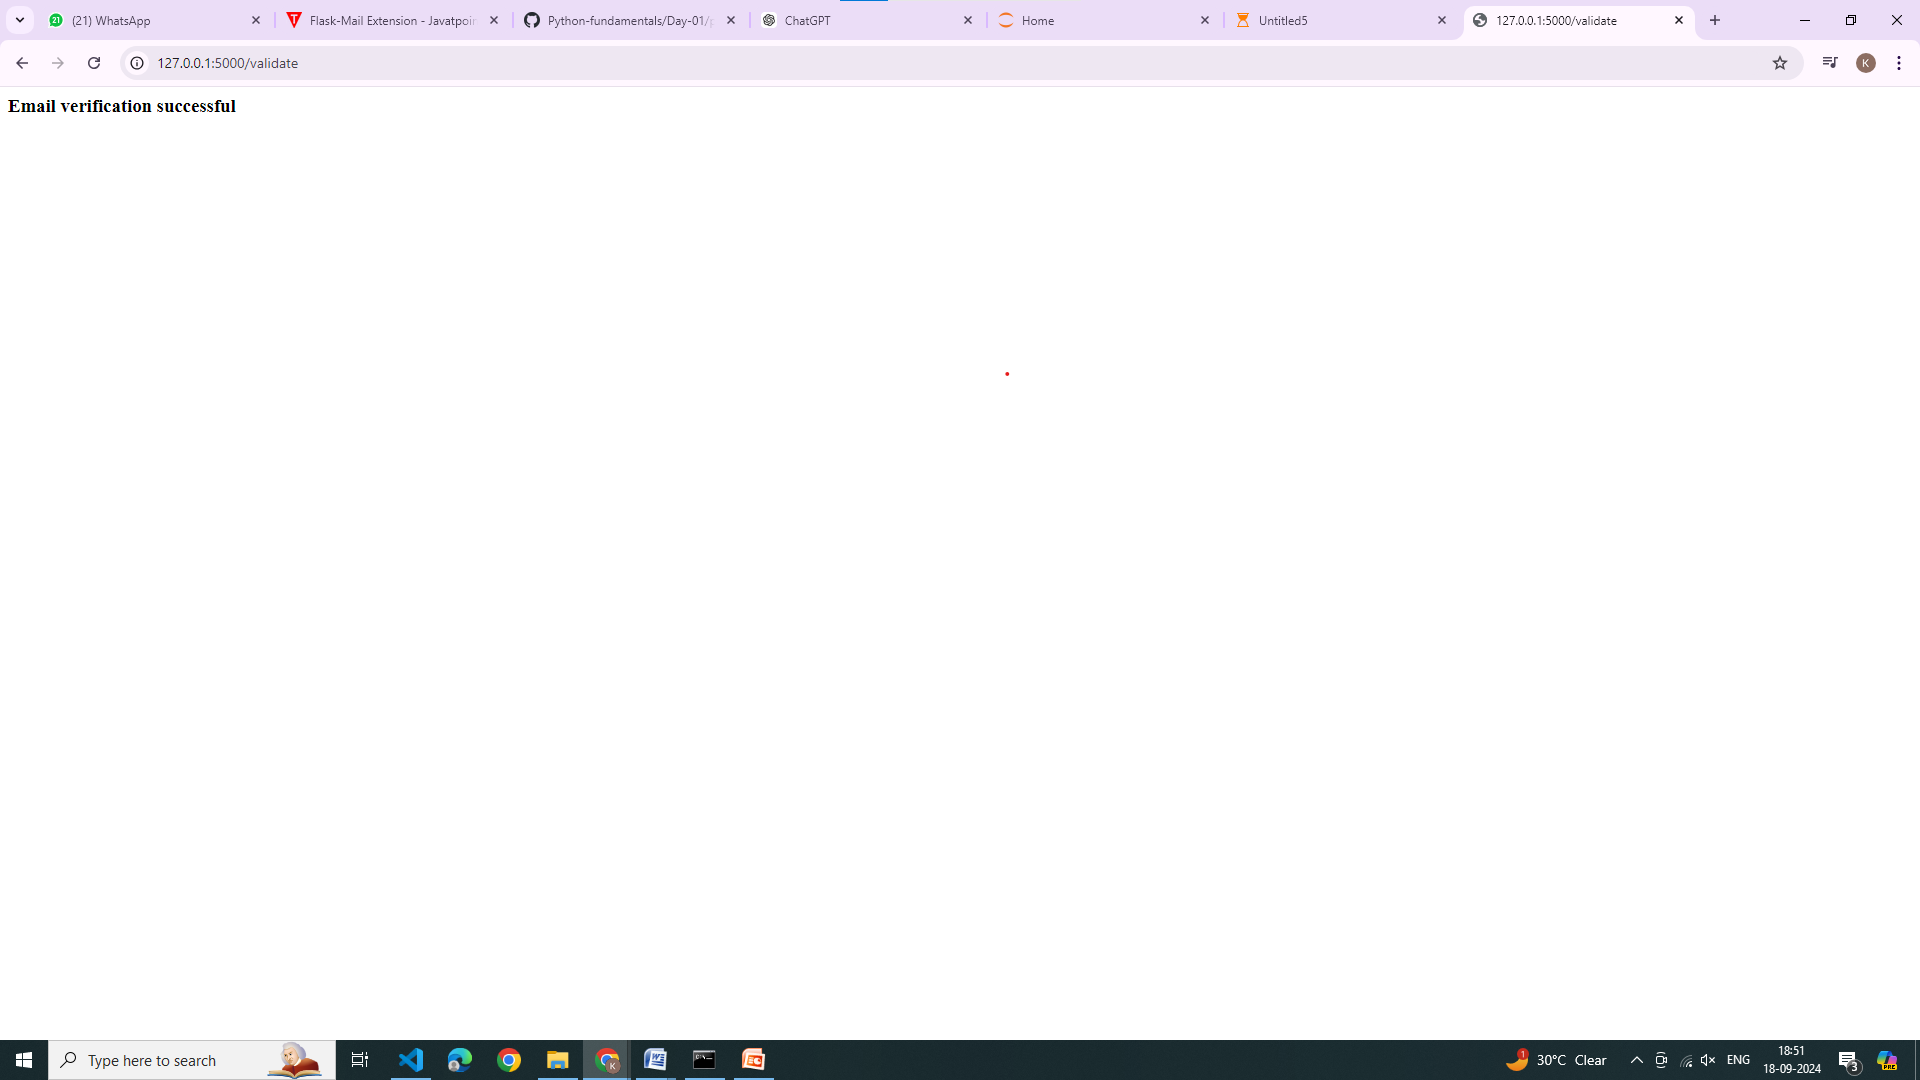

In [2]:
from IPython.display import Image,display
a=r"C:\Users\INTEL 89\Pictures\Screenshot 2024-09-18 185308.png"
b=r"C:\Users\INTEL 89\Pictures\Screenshot 2024-09-18 185336.png"
c=r"C:\Users\INTEL 89\Pictures\Screenshot 2024-09-18 185251.png"
d=r"C:\Users\INTEL 89\Pictures\Screenshot 2024-09-18 185230.png"
display(Image(filename=a))
display(Image(filename=b))
display(Image(filename=c))
display(Image(filename=d))

In [1]:
from flask import *
from flask_mail import *
app=Flask(__name__)
mail=Mail(app)
app.config['MAIL_SERVER']='smtp.gmail.com'
app.config['MAIL_PORT']=465
app.config['MAIL_USERNAME']='saibalajivennelakanti1112@gmail.com'
app.config['MAIL_PASSWORD']='hhur ojxo xnnl hgvw'
app.config['MAIL_USE_TLS']=False
app.config['MAIL_USE_SSL']=True
users = [{'name':'sai balaji','email':'saibalajivennelakanti1112@gmail.com'},{'name':'Ayush','email':'ayush@javatpoint.com'},
         {'name':'upendra','email':'lovelyupendra9@gmail.com'}]  
mail=Mail(app)
@app.route('/')
def index():
    with mail.connect() as consider:
        for user in users:
            message = "hello %s" %user['name']  
            msgs = Message(recipients=[user['email']],body = message, subject = 'hello', sender = 'saibalajivennelakanti1112@gmail.com')  
            consider.send(msgs)  
    return "Sent"  
if __name__ == "__main__":  
    app.run(port=5003)

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5003
Press CTRL+C to quit
127.0.0.1 - - [18/Sep/2024 22:42:55] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [18/Sep/2024 22:42:55] "GET /favicon.ico HTTP/1.1" 404 -


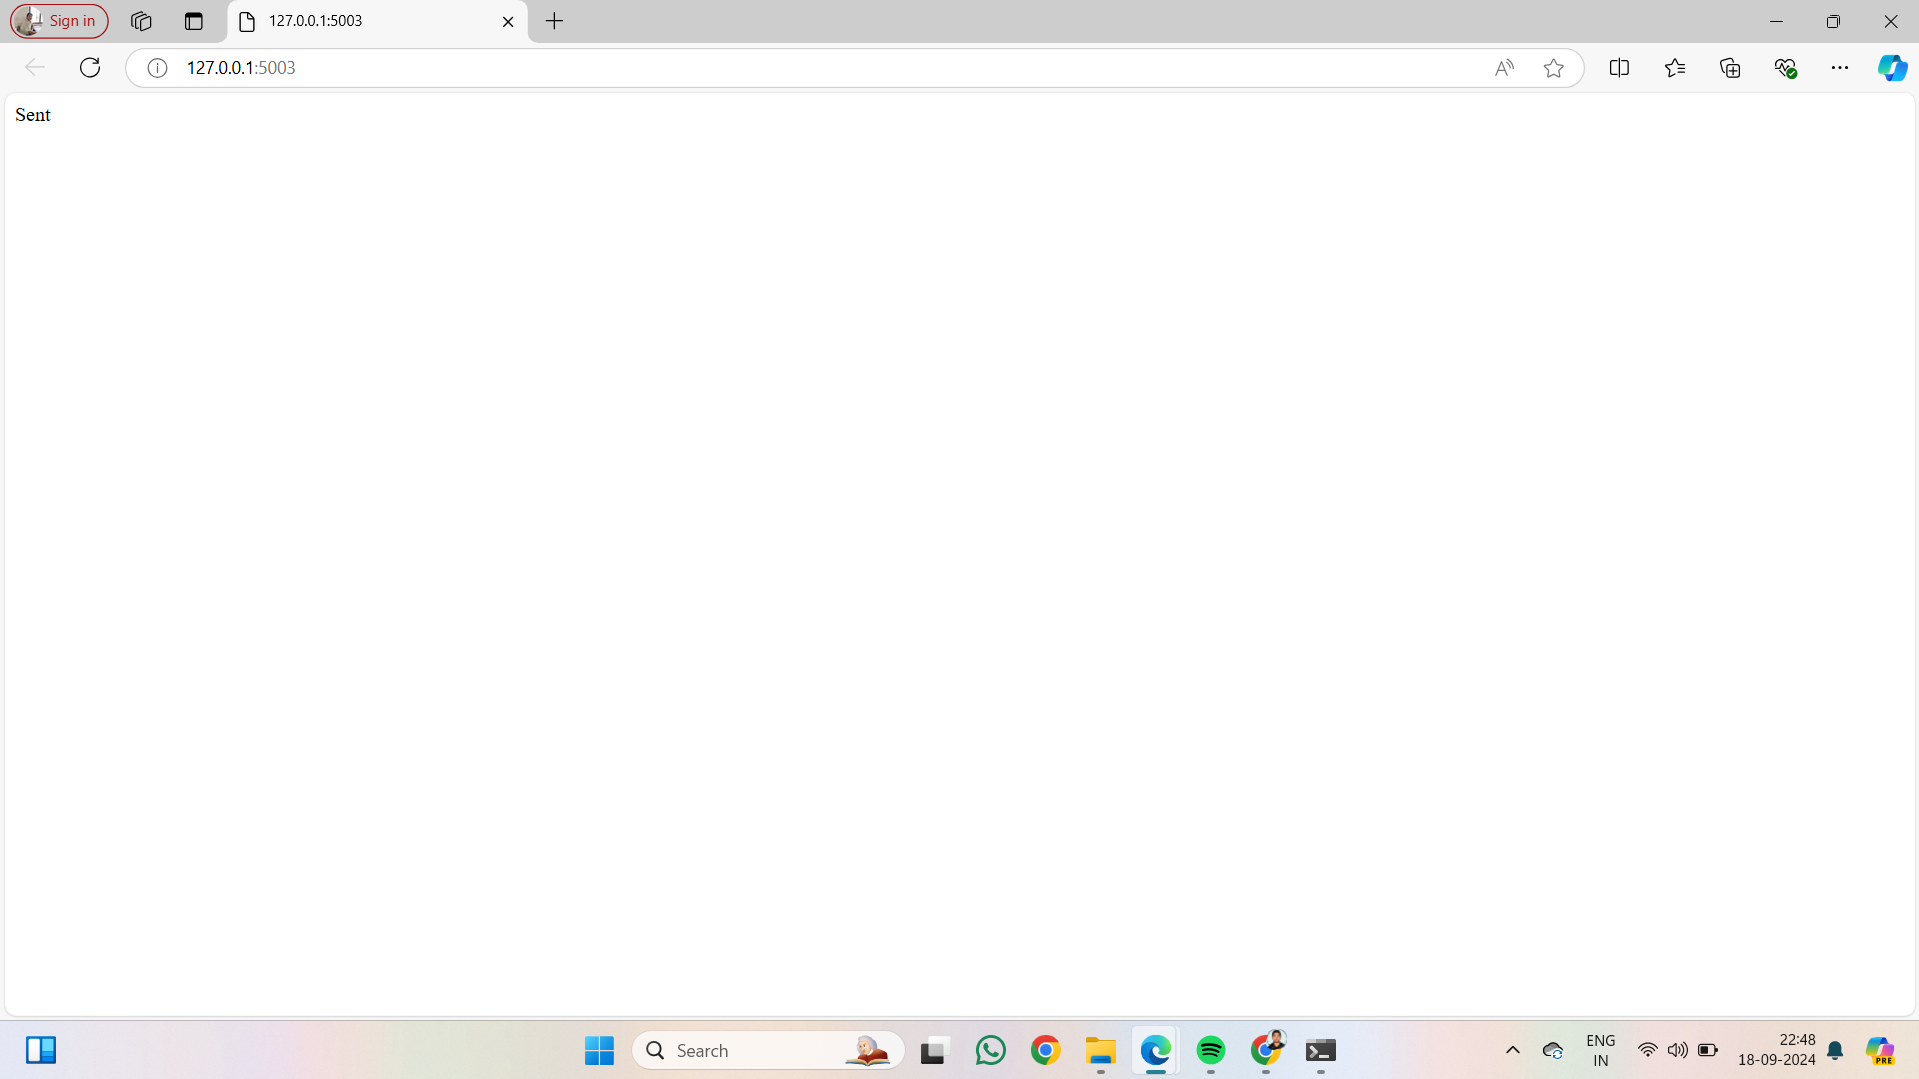

In [2]:
from IPython.display import Image,display
a=r"C:\Users\DELL\OneDrive\Pictures\Screenshots\Screenshot 2024-09-18 224803.png"
display(Image(filename=a))

In [ ]:
from flask import *
from flask_mail import *
app=Flask(__name__)
app.secret_key='abc'
mail=Mail(app)
app.config['MAIL_SERVER']='smtp.gmail.com'
app.config['MAIL_PORT']=465
app.config['MAIL_USERNAME']='saibalajivennelakanti1112@gmail.com'
app.config['MAIL_PASSWORD']='jprt aien sbzj jfjx'
app.config['MAIL_USE_TLS']=False
app.config['MAIL_USE_SSL']=True
mail=Mail(app)
@app.route('/')
def inedx():
    return render_template('inedx.html')
@app.route('/send_email',methods=['POST'])
def send_email():
    recipient_email=request.form['recipient_email']
    file=request.files['file']
    if not recipient_email or not file:
        flash("Recipient mail and files are required, error")
        return render_template('inedx.html')
    message=Message('File Attachment',sender='saibalajivennelakanti1112@gmail.com',recipients=[recipient_email])
    message.body="Please find the attached file"
    message.attach(file.filename,file.content_type,file.read())
    try:
        mail.send(message)
        flash('Mail sent successfully','success')
    except Exception as e:
        flash(f"failed to send email: {{str :e}}",'error')
    return render_template('inedx.html')
if __name__=='__main__':
    app.run(port=5003)

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5003
Press CTRL+C to quit
127.0.0.1 - - [20/Sep/2024 16:45:38] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [20/Sep/2024 16:45:49] "POST /send_email HTTP/1.1" 200 -
127.0.0.1 - - [20/Sep/2024 16:46:57] "POST /send_email HTTP/1.1" 200 -


In [ ]:
from IPython.display import Image,display
a=r"C:\Users\INTEL 89\Pictures\Screenshot 2024-09-20 164913.png"
b=r"C:\Users\INTEL 89\Pictures\Screenshot 2024-09-20 164951.png"
c=r"C:\Users\INTEL 89\Pictures\Screenshot 2024-09-20 165020.png"
display(Image(filename=a))
display(Image(filename=b))
display(Image(filename=c))